# UBER TRIPS ANALYSIS

# data importing and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("uberdrive.csv")

In [2]:
data.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
data.shape #no. of rows and no. of columns

(1156, 7)

In [5]:
data.size #total number of records

8092

In [6]:
data.info() #all info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
#checking for missing values
data.isnull().values.any()

True

In [8]:
#finding number of missing values
data.isnull().values.sum()

507

In [9]:
#Removing the null values and storing it in new dataframe
df=data.dropna()
df.isnull().values.any()

False

In [10]:
#summary of original data before dropping the null values
data.describe() 

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [11]:
#summary of data after dropping the null values
df.describe()
#count=no.of rows 

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [12]:
#instead of dropping the null values, we can fill it too instead
data['PURPOSE*'].fillna("NOT", inplace=True)

In [13]:
#changing the START_DATE and END_DATE to the date_time format so that it can further analyse
data['START_DATE'] = pd.to_datetime(data['START_DATE*'], 
                                       errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE*'], 
                                     errors='coerce')

# UBER DATA ANALYSIS

In [14]:
#unique start destinations
unique_start_dest=data['START*'].dropna() #removing the ones where unique destination is given as null
unique_start=set(unique_start_dest)
unique_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [15]:
#number of unique start destinations
len(unique_start)

176

In [16]:
# unique stop destinations
stop_destination=data['STOP*'].dropna() #removing the ones where unique stop destination is given as null
unique_stop=set(stop_destination)
unique_stop

{'Agnew',
 'Alief',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Arts District',
 'Asheville',
 'Banner Elk',
 'Bay Farm Island',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'Bywater',
 'CBD',
 'Capitol One',
 'Cary',
 'Cedar Hill',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Convention Center District',
 'Cory',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Depot Historic District',
 'Downtown',
 'Durham',
 'Eagle Rock',
 'East Elmhurst',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Emeryville',
 'Farmington Woods',
 'Faubourg Marigny',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'French Quarter',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gramercy-Flatiron',
 'Greater Greenspoint',
 'Gulfton',
 'Harden Place',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Hog Island',

In [17]:
len(unique_stop) #number of unique stop destinations

187

# finding most frequent start, stop dests, routes, purposes

In [18]:
#printing all the trips that have started from Almond
#here using the original data without dropping anything
data[data['START*']=='Almond']
#data.loc[data['START*']=='Almond']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,END_DATE
879,10/30/2016 12:58,10/30/2016 13:18,Business,Almond,Bryson City,15.2,NOT,NaT,NaT


In [19]:
#most popular starting point for Uber drivers
starting_point=data['START*'].dropna()
dx=pd.DataFrame(starting_point.value_counts())
dx.sort_values(['START*'],ascending= False)

dx= dx.reset_index()
dx= dx.rename(columns={'index':'starting_destination', 'START*':'starting_destination'})
dx.loc[dx['count']==max(dx['count'])]

,starting_destination,count
0,Cary,201


In [20]:
dx

,starting_destination,count
0,Cary,201
1,Unknown Location,148
2,Morrisville,85
3,Whitebridge,68
4,Islamabad,57
...,...,...
171,Ridgeland,1
172,Daytona Beach,1
173,Sky Lake,1
174,Sand Lake Commons,1


In [21]:
#most popular stopping point for Uber drivers
stopping_point=data['STOP*'].dropna() #removing all na from stop
dx=pd.DataFrame(stopping_point.value_counts())
dx.sort_values(['STOP*'],ascending= False)

dx= dx.reset_index()
dx= dx.rename(columns={'index':'stopping_destination', 'STOP*':'stopping_destination'})
dx.loc[dx['count']==max(dx['count'])]

,stopping_destination,count
0,Cary,203


In [22]:
dx

,stopping_destination,count
0,Cary,203
1,Unknown Location,149
2,Morrisville,84
3,Whitebridge,65
4,Islamabad,58
...,...,...
182,Daytona Beach,1
183,Sand Lake Commons,1
184,Sky Lake,1
185,Vista East,1


In [23]:
#most frequent route taken by Uber drivers
dx= data.dropna()
dx= pd.DataFrame(dx.groupby(['START*', 'STOP*']).size())
dx= dx.rename(columns={0:'Count'})
dx= dx.sort_values(['Count'], ascending = False)
dx.loc[dx['Count']==max(dx['Count'])]

,,Count
START*,STOP*,
Morrisville,Cary,36


In [24]:
dx

Count
START*      STOP*                    
Morrisville Cary                   36
Cary        Morrisville            34
            Cary                   23
            Durham                 19
Durham      Cary                   17
...                               ...
Karachi     Karachi                 1
            Unknown Location        1
Kenner      Kenner                  1
            Metairie                1
Whitebridge Williamsburg Manor      1

[184 rows x 1 columns]

In [25]:
#finding all purposes for trips
print(np.array(data['PURPOSE*'].dropna().unique()))
data['MILES*'].groupby(data['PURPOSE*']).sum()

['Meal/Entertain' 'NOT' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel        16.5
Between Offices      197.0
Charity ($)           15.1
Commute              180.2
Customer Visit      2089.5
Errand/Supplies      508.0
Meal/Entertain       911.7
Meeting             2851.3
Moving                18.2
NOT                17098.2
Temporary Site       523.7
Name: MILES*, dtype: float64

# DATA VISUALIZATION

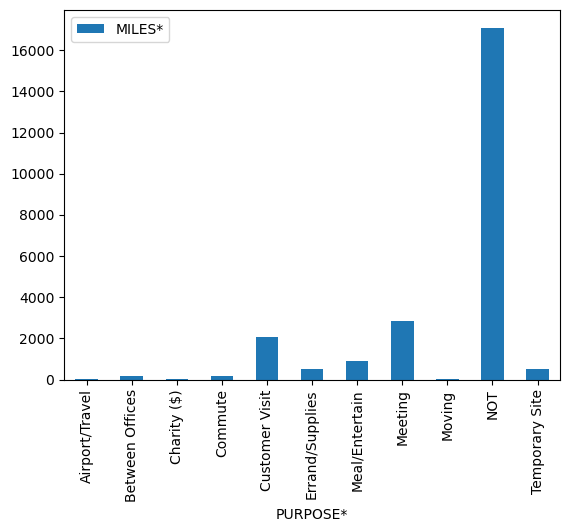

In [26]:
#purpose vs distance
dx=pd.DataFrame(data['MILES*'].groupby(data['PURPOSE*']).sum())
dx.plot(kind='bar')
plt.show()

<Axes: xlabel='MILES*', ylabel='PURPOSE*'>

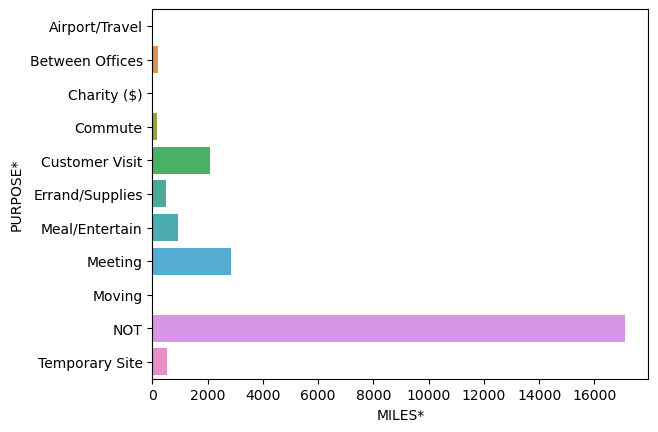

In [27]:
#in seaborn
dx=dx.reset_index()
sns.barplot(x=dx['MILES*'],y=dx['PURPOSE*'])

In [28]:
dx

,PURPOSE*,MILES*
0,Airport/Travel,16.5
1,Between Offices,197.0
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,2089.5
5,Errand/Supplies,508.0
6,Meal/Entertain,911.7
7,Meeting,2851.3
8,Moving,18.2
9,NOT,17098.2


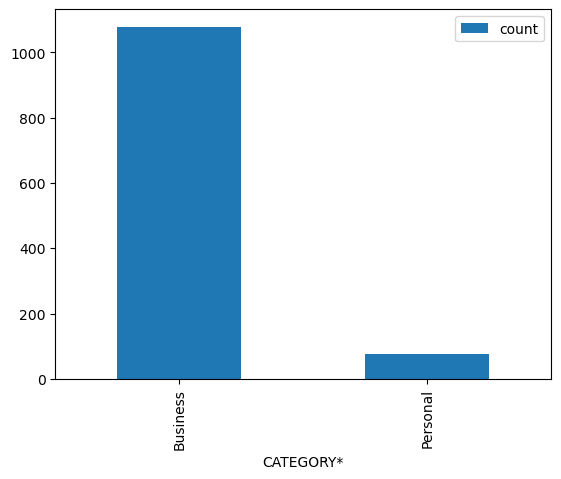

,count
CATEGORY*,
Business,1078
Personal,77


In [29]:
#no. of trips vs category
data.head()
dx = pd.DataFrame(data['CATEGORY*'].value_counts())

dx.plot(kind='bar')
plt.show()
dx

<Axes: >

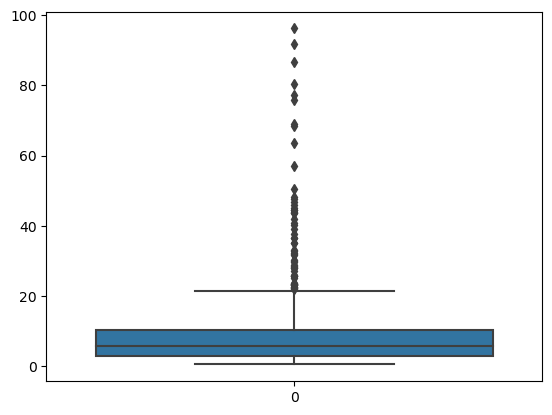

In [30]:
sns.boxplot(data[data['MILES*']<100]['MILES*'])

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


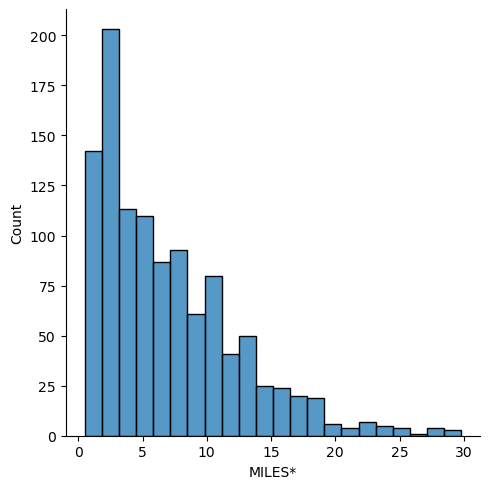

In [31]:
sns.displot(data[data['MILES*']<30]['MILES*'])

In [32]:
from datetime import datetime
 
data['date'] = pd.DatetimeIndex(data['START_DATE']).date
data['time'] = pd.DatetimeIndex(data['START_DATE']).hour
 
#changing into categories of day and night
data['day-night'] = pd.cut(x=data['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [33]:
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,END_DATE,date,time,day-night
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,2016-01-01,21.0,Night
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02 01:25:00,2016-01-02 01:37:00,2016-01-02,1.0,Morning
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2016-01-02,20.0,Night
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,2016-01-05,17.0,Evening
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site,NaT,NaT,NaN,NaN,NaN
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaT,NaN,NaN,NaN
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaT,NaN,NaN,NaN
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaT,NaN,NaN,NaN


In [34]:
#visulaizing data daywise
data['DAY'] = data.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
data['DAY'] = data['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

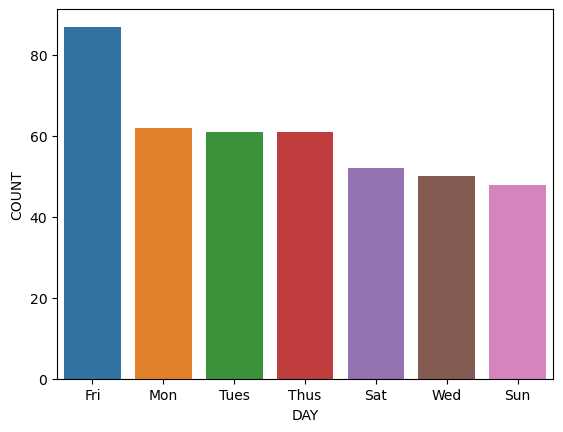

In [35]:
day_label = data.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

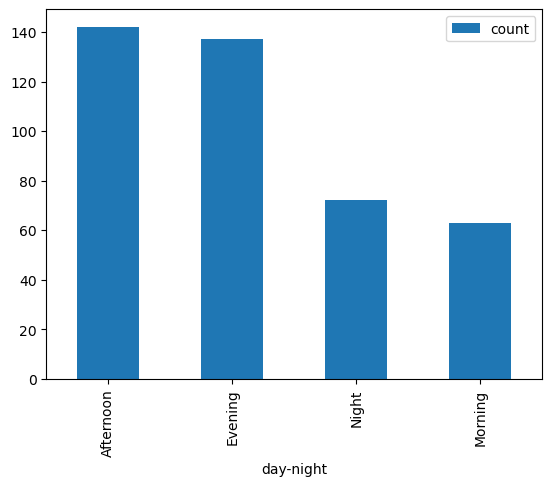

In [36]:
#visualizing no. of ubers during different times of the day

dx = pd.DataFrame(data['day-night'].value_counts())
dx.plot(kind='bar')
plt.show()

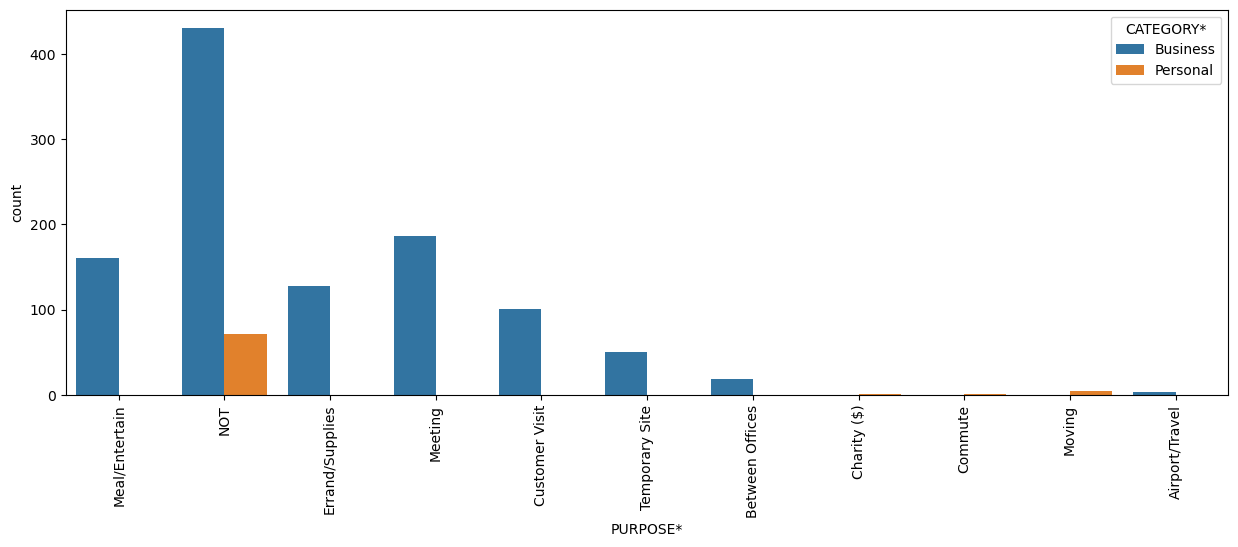

In [37]:
#comparing purposes for business and personal 
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='PURPOSE*', hue='CATEGORY*')
plt.xticks(rotation=90)
plt.show()